In [ ]:
!pip install -r requirements.txt

In [ ]:
!python -m visdom.server

In [ ]:
!start http://localhost:8097/

In [ ]:
!python train.py --dataroot ./datasets/torus/ --name torus --input_dim 2 --output_dim 3

In [1]:
import torch
from models import networks
import matplotlib.pyplot as plt
G_A = networks.define_G([2],[3],'ffnet_9layers',9,'instance',False)

initialize network with normal


In [2]:
weight_file = './checkpoints/torus/latest_net_G_A.pth'
state_dict = torch.load(weight_file)
G_A.load_state_dict(state_dict)

<All keys matched successfully>

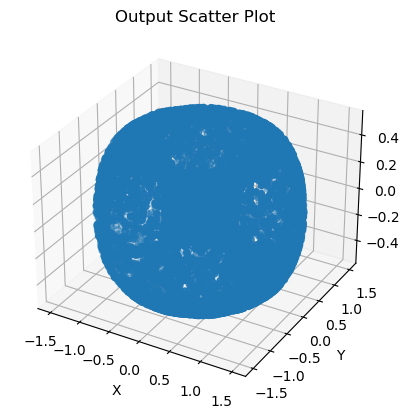

In [3]:
input_data = torch.rand(10000,2).view(-1,1,2)

# Pass the input through the G_A model
output_data = G_A(input_data)

# Extract the x, y, and z values from the output
x_values = output_data[:, 0].detach().numpy()
y_values = output_data[:, 1].detach().numpy()
z_values = output_data[:, 2].detach().numpy()

# Plot the scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_values, y_values, z_values)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Output Scatter Plot')
plt.show()

In [4]:
import numpy as np
import pandas as pd
output_data = pd.DataFrame(output_data.detach().numpy())
output_data.to_csv('./checkpoints/torus/test.csv')

In [5]:
import os
import numpy as np

dir = 'results/torus/'
if not os.path.exists(dir):
    # Create the directory if it doesn't exist
    os.makedirs(dir)

output_data = G_A(input_data)
output_data = output_data.view(-1, 3)
noisy_data = output_data + torch.randn(output_data.size()) * 0.01
noisy_data = noisy_data.detach().numpy()
output_data = output_data.detach().numpy()

np.savetxt(dir+'data_out.csv', output_data, delimiter=',')
np.savetxt(dir+'data_noise.csv', noisy_data, delimiter=',')
